#### Problem 2.1

In Equation (2.1), set $\delta = 0.03$ and let

$$
\epsilon(M,N,\delta) = \sqrt{\frac {1}{2N} \ln{\frac{2M}{\delta}}}
$$

(a) For $M = 1$, how many examples do we need to make $\epsilon \le 0.05$?
(b) For $M = 100$, how many examples do we need to make $\epsilon \le 0.05$?
(c) For $M = 10000$, how many examples do we need to make $\epsilon \le 0.05$?

**参考**：

等式(2.1)为：

$$
\epsilon = \sqrt{\frac{1}{N} \ln{\frac {2M}{\delta}}}
$$

对等式稍作变形有：

$$
\epsilon^2 = \frac {1}{2N} \ln{\frac {2M}{\delta}} \\
N = \frac{\ln{\frac{2M}{\delta}}}{2\epsilon^2}
$$

##### (a)

令 $M=1, \epsilon=0.05$，则有 $N \ge 839.9410155759853$，取 $N \ge 840$。

In [1]:
%run codes/problem2.1.py --M 1 --epsilon 0.05

839.9410155759853


##### (b)

令 $M=100, \epsilon=0.05$，则有 $N \ge 1760.9750527736032$，取 $N \ge 1761$。

In [2]:
%run codes/problem2.1.py --M 100 --epsilon 0.05

1760.9750527736032


##### (c)

令 $M=10000, \epsilon=0.05$，则有 $N \ge 2682.0090899712213$，取 $N \ge 2683$。

In [3]:
%run codes/problem2.1.py --M 10000 --epsilon 0.05

2682.0090899712213


#### Problem 2.2

Show that for the learning model of positive rectangles (aligned horizontally or vertically), $m_{\mathcal H}(4) = 2^4$ and $m_{\mathcal H}(5) < 2^5$. Hence, give a bound for $ m_{\mathcal H}(N)$.

**参考**：

![Positive Rectangle for N=4 and N=5](img/Positive_Rectangle_for_N=4_and_N=5.jpg)

题中的 $\mathcal H$ 如上图所示，是指边平行于 $x$ 轴和 $y$ 轴的矩形区域。

+ $m_{\mathcal H}(4)=2^4$ 比较简单，利用画图让矩形包含0个、1个、2个、3个以及4个点，可以得到 $1+4+6+4+1=2^4$。
+ $m_{\mathcal H}(5)$ 有两种解法，解法1运用代数证明，比较复杂，解法2运用几何证明，非常简洁。

##### 解法1

假设 $5$ 个点为 $(x_i,y_i),i=1,...,5$，不失一般性，我们假设

$$
x_i \le x_{i+1}, i=1,...,4
$$

我们要证明任意 $5$ 个点无法被shattered，只要证明上图右边的情形必然发生即可，即证明必然存在

$$
(x_i,y_i),(x_j,y_j),(x_k,y_k),l<j<k
$$

满足

$$
y_i \le y_j \le y_k 或 \\
y_i \ge y_j \ge y_k
$$

注意到上述条件可以化为一个条件：

$$
(y_i - y_j)(y_j - y_k) \ge 0
$$

那么为什么上述不等式成立必然可以推出 $m_{\mathcal H}(5)<2^5$呢？这是因为如果该不等式成立，当 $(x_i,y_i),(x_k,y_k)$ 同时标记为 $+1$ 或 $-1$ 时，那么 $(x_j,y_j)$ 必然也有相同的标记。（如上右图所示，$3$ 个点在同一个矩形内）

下面证明这种情形必然发生，利用反证法，假设上述情形不会发生，那么对任意 $i<j<k$，我们有

$$
(y_i - y_j)(y_j - y_k) < 0
$$

取 $i=1,k=5$ 可得

$$
(y_1 - y_j)(y_j - y_5) < 0, j=2,...,4
$$

取 $i=1,k=4$ 可得

$$
(y_1 - y_j)(y_j - y_4) < 0, j=2,...,3
$$

取 $i=1,k=3$ 可得

$$
(y_1 - y_j)(y_j - y_3) < 0, j=2
$$

所以有

$$
(y_1 - y_2)(y_2 - y_5) < 0, (y_1 - y_2)(y_2 - y_4) < 0 \\
(y_1 - y_2)(y_2 - y_5) < 0, (y_1 - y_2)(y_2 - y_3) < 0 \\
(y_1 - y_3)(y_3 - y_5) < 0, (y_1 - y_3)(y_3 - y_4) < 0
$$

因此

$$
(y_2-y_5)(y_2-y_4) > 0 \tag{1}
$$
$$
(y_2-y_5)(y_2-y_3) > 0 \tag{2}
$$
$$
(y_3-y_5)(y_3-y_4) > 0 \tag{3}
$$

如果 $y_4 > y_5$，由(1)，(3)可得

$$
y_3 < y_5 或 y_3 > y_4 \tag{4}
$$
$$
y_2 < y_5 或 y_2 > y_4 \tag{5}
$$

对(4)分情况讨论：

+ 如果 $y_3>y_4$，那么

$$
y_3 > y_4 > y_5 \\
(y_3 - y_4)(y_4 - y_5) >0
$$

这就与我们的假设矛盾。

+ 如果 $y_3<y_5$，那么由(2)可得

$$
y_2 < y_3 或 y_2 > y_5 \tag{6}
$$

对(6)分情况讨论

+ 如果 $y_2<y_3$，那么

$$
y_2 < y_3 <y_5 \\
(y_2 - y_3)(y_3 - y_5) >0
$$

这就与我们的假设矛盾。

+ 如果 $y_2 > y_5$，由(5)可得必然有 $y_2 > y_4$，所以

$$
y_2 > y_4 > y_5 \\
(y_2 - y_4)(y_4 - y_5) >0
$$

这就与我们的假设矛盾。

综上，$y_4 > y_5$ 会产生矛盾。

如果，$y_4 < y_5$，由(1)，(3)可得

$$
y_3 < y_4 或 y_3 > y_5 \tag{7}
$$
$$
y_2 < y_4 或 y_2 > y_5 \tag{8}
$$

对(7)分情况讨论：

+ 如果 $y_3 < y_4$，那么

$$
y_3 < y_4 < y_5 \\
(y_3 - y_4)(y_4 - y_5) >0
$$

这就与我们的假设矛盾。

+ 如果 $y_3 >y_5$，那么由(2)可得

$$
y_2 < y_5 或 y_2 > y_3 \tag{9}
$$

对(9)分情况讨论

+ 如果 $y_2 > y_3$，那么

$$
y_2 > y_3 > y_5 \\
(y_2 - y_3)(y_3 - y_5) >0
$$

这就与我们的假设矛盾。

+ 如果 $y_2<y_5$，那么由(8)可得 $y_2<y_4$，所以

$$
y_2 < y_4 < y_5 \\
(y_2 - y_4)(y_4 - y_5) > 0
$$

这就与我们的假设矛盾。

综上，$y_4 < y_5$ 会产生矛盾。

综上，无论哪种情形都会产生矛盾，所以必然存在 $i<j<k$，使得

$$
(y_i - y_j)(y_j - y_k) \ge 0
$$

所以

$$
m_{\mathcal H}(5) < 2^5
$$

结合以上两点可得 $d_{\text{vc}}=4$，所以

$$
m_{\mathcal H}(N) \le N^{d_{\text{vc}}} + 1 = N^4 + 1
$$

##### 解法2

+ 依旧假设 $5$ 个点为 $(x_i,y_i),i=1,...,5$。
+ 找到 $4$ 个点：纵坐标最大和最小的点，横坐标最大和最小的点，注意这四个点可能部分重合，但是至少能找到 $2$ 个点。
+ 将这些点标记为 $+1$，其余的点标记为 $-1$，那么这种情形必然无法用positive rectangle分类。

#### Problem 2.3

Compute the maximum number of dichotomies, $m_{\mathcal H}(N)$, for these learning models, and consequently compute $d_{\text{vc}}$, the VC dimension.

(a) Positive or negative ray: $\mathcal H$ contains the functions which are $+1$ on $[a, +\infty)$ (for some $a$) together with those that are $+1$ on $(-\infty, a]$ (for some $a$).

(b) Positive or negative interval: $\mathcal H$ contains the functions which are $+1$ on an interval $[a, b]$ and $-1$ elsewhere or $-1$ on an interval $[a, b]$ and $+1$ elsewhere.

(c) Two concentric spheres in $\R^d$: $\mathcal H$ contains the functions which are $+1$ for $a \le \sqrt{x_1^2+...+x_d^2} \le b$.

**参考**：

该题旨在计算成长函数 $m_{\mathcal H}(N)$ 以及VC dimension $d_{\text{vc}}$

(a) 这题的假设相当于在 $N$ 个点中画了一条直线，左边的为 $-1$，右边的为 $+1$，或者左边的为 $+1$，右边的为 $-1$，除去全为 $+1$ 和全为 $-1$ 的情形，一共有 $2(N-1)$ 种，那么全为 $+1$ 和全为 $-1$ 的情形，一共有 $2N-2+2=2N$ 种情形。因此

$$
m_{\mathcal H}(N)=2N
$$

+ 当 $N=1$ 时，$m_{\mathcal H}(N)=2=2^1$
+ 当 $N=2$ 时，$m_{\mathcal H}(N)=4=2^2$
+ 当 $N=3$ 时，$m_{\mathcal H}(N)=6<2^3$

所以 $d_{\text{vc}}=2$

(b) 分两种情形考虑，第一种和第二种分别如下所示

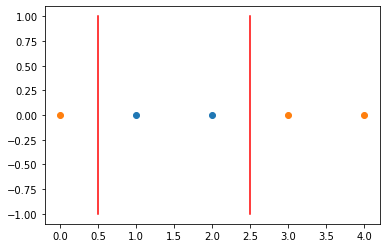

In [2]:
%run codes/problem2.3.py --Situation 1

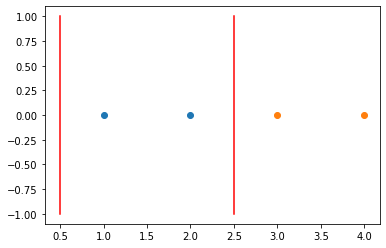

In [3]:
%run codes/problem2.3.py --Situation 2

##### (b)

+ 第一种情形为分界区间 $[a,b]$ 两侧都有元素，这种情形不考虑全为 $-1$ 或者全为 $+1$ 的情况，所以这种情形共有 $2C_{N-1}^2=(N-1)(N-2)$，乘以 $2$ 是因为矩形内部可以为 $-1$，也可以为 $+1$。
+ 第二种情形为分界区间 $[a,b]$ 只有一侧有元素，这种情形共有 $2(N+1)-2=2N$，减 $2$ 是因为全为 $+1$ 或者全为 $-1$ 的情形被重复计算了。

所以成长函数为

$$
m_{\mathcal H}(N)=(N-1)(N-2)+2N=N^2-N+2
$$

+ 当 $N=1$ 时，$m_{\mathcal H}(N)=2=2^1$
+ 当 $N=2$ 时，$m_{\mathcal H}(N)=4=2^2$
+ 当 $N=3$ 时，$m_{\mathcal H}(N)=8=2^3$
+ 当 $N=4$ 时，$m_{\mathcal H}(N)=14<2^4$

因此 $d_{\text{vc}}=3$

(c) 做映射 $y=\sqrt{x_1^2+...+x_d^2}$，所以这个问题可以化为类似(b)的问题（这里的不同之处在于 $[a,b]$ 区间内的元素只能为 $+1$）。这里是两个超球面之间的部分为 $+1$，因此问题为 $d$ 个点之间以及两侧共 $d+1$ 个间隔中挑选 $2$ 个，最后要需要考虑全为 $-1$ 的情形，因此

$$
m_{\mathcal H}(N)=C_{N+1}^2+1=\frac{N(N+1)}{2}+1
$$

+ 当 $N=1$ 时，$m_{\mathcal H}(N)=2=2^1$
+ 当 $N=2$ 时，$m_{\mathcal H}(N)=4=2^2$
+ 当 $N=3$ 时，$m_{\mathcal H}(N)=7<2^3$

因此 $d_{\text{vc}}=2$

#### Problem 2.4

Show that $B(N, k)=\sum_{i=0}^{k-1} \binom{N}{i}$ by showing the other direction to Lemma 2.3, namely that

$$
B(N, k) \ge \sum_{i=0}^{k-1} \binom{N}{i}
$$

To do so, construct a specific set of $\sum_{i=0}^{k-1} \binom{N}{i}$ dichotomies that does not shatter any subset of $k$ variables. [Hint: Try limiting the number of $-1$'s in each dichotomy]

**参考**：

考虑 $N$ 个元素的点集，点集中最多有 $k-1$ 个 $-1$，那么这样的点集有 $\sum_{i=0}^{k-1} \binom{N}{i}$ 种。考虑 $k$ 个元素的子集，那么 $(-1,-1,...,-1)$ （全为 $-1$ 的情形）必然无法被表出，因为最多有 $k-1$ 个点为 $-1$。那么由 $B(N,k)$ 的定义知

$$
B(N, k) \ge \sum_{i=0}^{k-1} \binom{N}{i}
$$

因此

$$
B(N, k) = \sum_{i=0}^{k-1} \binom{N}{i}
$$

#### Problem 2.5

Prove by induction that $\sum_{i=0}^{D} \binom{N}{i} \le N^D+1$, hence

$$
m_{\mathcal H}(N) \le N^{d_{\text{vc}}}+1
$$

**参考**：

使用数学归纳法进行证明：

+ 当 $D=0$ 时，

$$
\sum_{i=0}^{D} \binom{N}{i}=1 \\
N^D+1=1+1=2
$$

所以当 $D=0$ 时，不等式成立。

+ 假设当 $D=k$ 时不等式成立，当 $D=k+1$ 时

$$
\sum_{i=0}^{k+1} \binom{N}{i}=\sum_{i=0}^{k} \binom{N}{i}+\binom{N}{k+1} \le N^k+1+\binom{N}{k+1}
$$

对 $\binom{N}{k+1}$ 进行放缩

$$
\binom{N}{k+1}=\frac{N!}{(k+1)!(N-k-1)!}=\frac{N(N-1)...(N-k)}{(k+1)!} \le N(N-1)...(N-k) \le N^k(N-1)
$$

因此

$$
\begin{aligned}
\sum_{i=0}^{k+1} \binom{N}{i} &\le N^k+1+\binom{N}{k+1} \\
&\le N^k+1+N^k(N-1) \\ &= N^{k+1}+1
\end{aligned}
$$

所以对 $D=k+1$ 不等式也成立。

由前面的知识有

$$
m_{\mathcal H}(N) \le \sum_{i=0}^{d_{\text{vc}}} \binom{N}{i}
$$

所以有

$$
m_{\mathcal H}(N) \le \sum_{i=0}^{d_{\text{vc}}} \binom{N}{i} \le N^{d_{\text{vc}}}+1
$$

#### Problem 2.6

Prove that for $N \ge d$,

$$
\sum_{i=0}^{d} \binom{N}{i} \le (\frac{eN}{d})^d.
$$

We suggest you first show the following intermediate steps.

(a) $\sum_{i=0}^{d} \binom{N}{i} \le \sum_{i=0}^{d} \binom{N}{i}(\frac{N}{d})^{d-i} \le (\frac{N}{d})^d \sum_{i=0}^{N} \binom{N}{i}(\frac{d}{N})^i$.

(b) $\sum_{i=0}^{N} \binom{N}{i}(\frac{d}{N})^i \le e^d$. [Hints: Binomial theorem; $(1+\frac{1}{x})^x \le e$ for $x \ge 0$.]

Hence, argue that $m_{\mathcal H}(N) \le (\frac{eN}{d_{\text{vc}}})^{d_{\text{vc}}}$.

**参考**：

(a) 因为 $N \ge d,d \ge i$，所以 $(\frac{N}{d})^{d-i} \ge 1$，那么

$$
\sum_{i=0}^{d} \binom{N}{i} \le \sum_{i=0}^{d} \binom{N}{i}(\frac{N}{d})^{d-i} = (\frac{N}{d})^d \sum_{i=0}^{d} \binom{N}{i}(\frac{d}{N})^{i} \le (\frac{N}{d})^d \sum_{i=0}^{N} \binom{N}{i}(\frac{d}{N})^{i}
$$

(b) 由二项式定理

$$
\sum_{i=0}^{N} \binom{N}{i}(\frac{d}{N})^{i} = \sum_{i=0}^{N} \binom{N}{i}(\frac{d}{N})^{i}1^{N-i}=(1+\frac{d}{N})^N
$$

由 $(1+\frac{1}{x})^x \le e$，我们知道

$$
(1+\frac{d}{N})^N=(1+\frac dN)^{\frac{N}{d}d} \le e^d
$$

因此

$$
\sum_{i=0}^{N} \binom{N}{i}(\frac{d}{N})^{i} = (1+\frac{d}{N})^N \le e^d \\
\sum_{i=0}^{d} \binom{N}{i} \le (\frac N d)^d\sum_{i=0}^{N}\binom N i(\frac d N)^i\le (\frac N d)^d e^d=(\frac {eN}d )^d
$$

由之前结论我们知道

$$
m_{\mathcal H}(N) \le \sum_{i=0}^{d_{\text{vc}}} \binom{N}{i}
$$

那么由这题的结论可得

$$
m_{\mathcal H}(N) \le (\frac{eN}{d_{\text{vc}}})^{d_{\text{vc}}}
$$

#### Problem 2.7

Plot the bounds for $m_{\mathcal H}(N)$ given in Problems 2.5 and 2.6 for $d_{\text{vc}} = 2$ and $d_{\text{vc}} = 5$. When do you prefer one bound over the other?

参考：

根据问题2.5以及2.6画出 $m_{\mathcal H}(N)$ 的上界

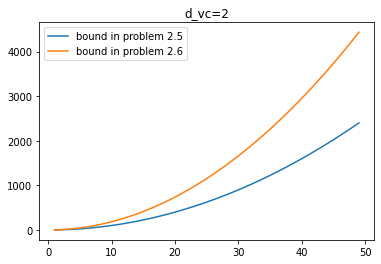

In [2]:
%run codes/problem2.7.py --dvc 2

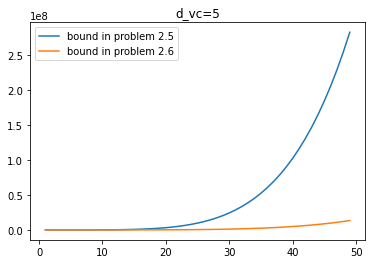

In [3]:
%run codes/problem2.7.py --dvc 5

##### 参考

从可以看到，当 $d_{\text{vc}}=2$ 时，问题2.5得到的上界要明显好于问题2.6得到的上界，而当 $d_{\text{vc}}=5$ 时，问题2.6得到的上界要明显好于问题2.5得到的上界，下面分析下原因。

问题2.5得到的上界为

$$
N^{d_{\text{vc}}}+1
$$

问题2.6得到的上界为

$$
(\frac{eN}{d_{\text{vc}}})^{d_{\text{vc}}}
$$

+ 当 $d_{\text{vc}}=2$ 时，$\frac{e}{d_{\text{vc}}}>1$，所以当 $N$ 充分大时，$(\frac{eN}{d_{\text{vc}}})^{d_{\text{vc}}}$ 明显大于 $N^{d_{\text{vc}}}+1$

+ 当 $d_{\text{vc}}=5$ 时，$\frac{e}{d_{\text{vc}}}<1$，所以当 $N$ 充分大时，$(\frac{eN}{d_{\text{vc}}})^{d_{\text{vc}}}$ 明显小于 $N^{d_{\text{vc}}}+1$

所以当 $d_{\text{vc}} \le 2$ 时，选 $N^{d_{\text{vc}}}+1$ 作为上界，其余情形选择 $(\frac{eN}{d_{\text{vc}}})^{d_{\text{vc}}}$ 作为上界。

#### Problem 2.8

Which of the following are possible growth functions $m_{\mathcal H}(N)$for some hypothesis set:

$$
1+N; 1+N+\frac{N(N-1)}{2}; 2^N; 2^{\lfloor \sqrt{N} \rfloor}; 2^{\lfloor \frac{N}{2} \rfloor}; 1+N+\frac{N(N-1)(N-2)}{6}.
$$

**参考**：

我们知道 $m_{\mathcal H}(N)$ 要么等于 $2^N$，要么有一个多项式的上界，根据这两点，除了 $2^{\lfloor \sqrt{N} \rfloor}$ 以及 $2^{\lfloor \frac{N}{2} \rfloor}$ 以外，其余函数均有可能成为 $m_{\mathcal H}(N)$。

#### Problem 2.9

[hard] For the perceptron in $d$ dimensions, show that

$$
m_{\mathcal H}(N)=2\sum_{i=0}^{d}\binom{N-1}{i}. \ \text{[Hint: Cover (1965) in Further Reading.]}
$$

Use this formula to verify that $d_{\text{vc}}=d+1$ by evaluating $m_{\mathcal H}(d+1)$ and $m_{\mathcal H}(d+2)$. Plot $m_{\mathcal H}(N)/2^N$ for $d=10$ and $N \in [1, 40]$. If you generate a random dichotomy on $N$ points in 10 dimensions, give an upper bound on the probability that the dichotomy will be separable for $N=10,20,40$.

**参考**：

[参考资料](http://web.mit.edu/course/other/i2course/www/vision_and_learning/perceptron_notes.pdf)

记 $N$ 个数据，维度为 $d$ 的成长函数 $m_{\mathcal H}(N)$ 为 $f(N,d)$，我们考虑 $f(N,d)$ 的递推关系。

假设 $B=\{(b_1,b_2,...,b_N), b_i \in \{1,-1\}\}$ 是维度为 $d$，$N$ 个点所有可以被表示出来的所有组合，也就是说 $\forall \ (b_1,b_2,...,b_N) \in B,\exists w \in \R^d,(x_1,x_2,...,x_N),(x_i \in \R^d)$ 使得

$$
(\text{sign}(w^T x_1),\text{sign}(w^T x_2),...,\text{sign}(w^T x_N))=(b_1,b_2,...,b_N)
$$

那么此时增加一个点 $x_{N+1}$

$$
(\text{sign}(w^T x_1),\text{sign}(w^T x_2),...,\text{sign}(w^T x_N),\text{sign}(w^Tx_{N+1}))=(b_1,b_2,...,b_N,\text{sign}(w^T x_{N+1}))
$$

现在考虑以下两种情况：

+ 情形1

$w^T x_{N+1} \neq 0$，那么 $\text{sign}(w^T x_{N+1})$ 等于 $+1$ 或 $-1$，则 $(b_1,b_2,...,b_N,\text{sign}(w^T x_{N+1}))$ 可以直接被表示出来，记满足这个条件的数量为 $C_1$

+ 情形2

$w^T x_{N+1}=0$，那么此时需要对 $w$ 进行旋转，可以进行如下处理。令

$$
t = \max_{i=1,2,...,N}|x_{N+1}^T x_i| \\
M = \min_{i=1,2,...,N}|w^T x_i| \\
k = \frac{M}{2t}
$$

那么对于 $w_1=w \pm kx_{N+1}$

$$
w_1^T x_i = (w \pm kx_{N+1})^T x_i = w^T x_i \pm kx_{N+1}^T x_i \\
|kx_{N+1}^T x_i| = |\frac{M}{2t}x_{N+1}^T x_i| = \frac{M}{2t}|x_{N+1}^T x_i| \le \frac{M}{2t} \times t = \frac{M}{2} \le \frac{|w^T x_i|}{2}
$$

对于任何非零的数 $a$，$a \pm \frac{|a|}{2}$ 与 $a$ 同号，所以 $w_1^T x_i$ 与 $w^T x_i$ 同号。

再来观察 $w_1^T x_{N+1}$ 的符号，注意 $w^Tx_{N+1}=0$：

$$
w_1^T x_{N+1} = (w \pm kx_{N+1})^T x_{N+1} = w^Tx_{N+1} \pm kx_{N+1}^T x_{N+1} = \pm kx_{N+1}^T x_{N+1}
$$

所以当 $w_1=w+kx_{N+1}$ 时，$w_1^T x_{N+1}>0$，当 $w_1=w-kx_{N+1}$ 时，$w_1^T x_{N+1}<0$

综上所述，当 $w^Tx_{N+1}=0$ 时，通过旋转 $w$，$(b_1,b_2...b_N,\pm 1)$ 均可以被表示出来，记满足这个条件的数量为 $C_2$

接下来分析 $C_1$ 以及 $C_2$：

+ $C_2$ 是有一个约束条件 $w^T x_{N+1}=0$ 下的最大可表示出来的数量，所以这相当于 $d-1$ 维（有一个约束条件，所以减小一个维度）下 $N$ 个点的最大可表示出来的数量乘以2（$\text{sign}(w^T x_{N+1})$ 可正可负），也就是说 $C_2=2f(N,d-1)$。
+ 而 $C_1$ 相当于所有 $f(N,d)$ 减去满足 $w^Tx_{N+1}=0$ 条件下的表示数量 $f(N,d-1)$，即 $C_1=f(N,d)-f(N,d-1)$

因此

$$
f(N+1,d) = C_1+C_2 = 2f(N,d-1)+f(N,d)-f(N,d-1) = f(N,d)+f(N,d-1)
$$

其余的步骤由数学归纳法即可。

$$
f(N+1,d)=f(N,d)+f(N,d-1)=2\sum_{i=0}^{d}\binom{N-1}{i}+2\sum_{i=0}^{d-1}\binom{N-1}{i}
$$

我们知道

$$
\binom{n}{k}=\binom{n-1}{k}+\binom{n-1}{k-1}
$$

因此

$$
\begin{aligned}
f(N+1,d) &= 2\sum_{i=0}^{d}\binom{N-1}{i}+2\sum_{i=0}^{d-1}\binom{N-1}{i} \\
&= 2+2\sum_{i=1}^{d}\binom{N-1}{i}+2\sum_{i=0}^{d-1}\binom{N-1}{i} \\
&= 2+2\sum_{i=1}^{d}\binom{N-1}{i}+2\sum_{i=1}^{d}\binom{N-1}{i-1} \\
&= 2+2\sum_{i=1}^{d}\binom{N}{i} \\
&= 2\sum_{i=0}^{d}\binom{N}{i}
\end{aligned}
$$

因此结论成立。

下面计算下 $d_{\text{vc}}$

$$
m_{\mathcal H}(d+1) = 2\sum_{i=0}^{d}\binom{d}{i} = 2^{d+1} \\
m_{\mathcal H}(d+2) = 2\sum_{i=0}^{d}\binom{d+1}{i} = 2(2^{d+1}-1) = 2^{d+2}-2 < 2^{d+2}
$$

所以 $d_{\text{vc}}=d+1$，这也符合之前的结论。

下面是作图，注意这里的概率其实就是 $\frac{m_{\mathcal H}(N)}{2^N}$，因为一共有 $2^N$ 种，而可表示出来的一共有 $m_{\mathcal H}(N)$ 种。

概率也如下所示，可以看到对于 $d=10$，只要有 $40$ 个点就只有 $0.1\%$ 的概率能够表出了。

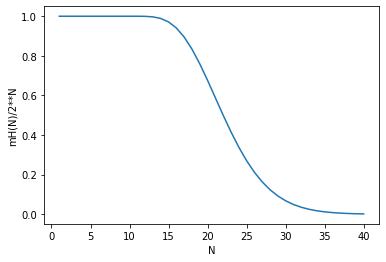

[1.0, 0.6761970520019531, 0.0016889239559532143]


In [1]:
%run codes/problem2.9.py

#### Problem 2.10

Show that $m_{\mathcal H}(2N) \le m_{\mathcal H}(N)^2$, and hence obtain a generalization bound which only involves $m_{\mathcal H}(N)$.

**参考**：

将 $2N$ 个点分为前 $N$ 个和后 $N$ 个，记前 $N$ 个点的区分方法为 $f_1(N)$，后 $N$ 个点的区分方法为 $f_2(N)$，由乘法原理，$m_{\mathcal H}(2N) \le f_1(N) \times f_2(N)$，显然 $f_1(N) \le m_{\mathcal H}(N),f_2(N) \le m_{\mathcal H}(N)$。因此

$$
m_{\mathcal H}(2N) \le m_{\mathcal H}(N)^2
$$

#### Problem 2.11

Suppose $m_{\mathcal H}(N)=N+1$, so $d_{\text{vc}}=1$. You have 100 training examples. Use the generalization bound to give a bound for $E_{\text{out}}$ with confidence 90%. Repeat for $N = 10000$.

**参考**：

这题要使用问题2.10的不等式，generalization bound公式如下：

$$
E_{\text{out}}(g) \le E_{\text{in}}(g) + \sqrt{\frac{8}{N}\ln{(\frac{4m_{\mathcal H}(2N)}{\delta})}}
$$

其概率大于等于 $1-\delta$，对这题来说 $\delta=0.1$。下面进行计算：

In [2]:
%run codes/problem2.11.py --N 100

0.8481596247015304


In [3]:
%run codes/problem2.11.py --N 10000

0.10427815497178729


#### Problem 2.12

For an $\mathcal H$ with $d_{\text{vc}}=10$, what sample size do you need (as prescribed by the generalization bound) to have a 95% confidence that your generalization error is at most 0.05?

**参考**：

generalization bound公式如下：

$$
E_{\text{out}}(g) \le E_{\text{in}}(g) + \sqrt{\frac{8}{N}\ln{\left(\frac{4\left({(2N)}^{d_{\text{vc}}} + 1 \right)}{\delta} \right)}}
$$

其概率大于等于 $1-\delta$。

该题中 $\delta=0.05,\epsilon=\sqrt{\frac{8}{N}\ln{\left(\frac{4\left({(2N)}^{d_{\text{vc}}}+1\right)}{\delta}\right)}}=0.05$

这个方程难以直接求解，可以作图查看。求解结果可以看到满足要求的 $N$ 非常大。

满足精度要求和置信度要求的N为452957


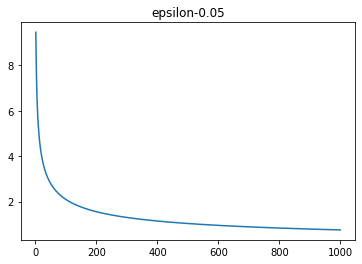

In [1]:
%run codes/problem2.12.py

#### Problem 2.13

(a) Let $\mathcal H=\{h_1,h_2,...,h_M\}$ with some finite $M$. Prove that $d_{\text{vc}}(\mathcal H) \le \log_{2} M$.

(b) For hypothesis sets $\mathcal H_1,\mathcal H_2,...,\mathcal H_k$ with finite VC dimensions $d_{\text{vc}}(\mathcal H_k)$, derive and prove the tightest upper and lower bound that you can get on $d_{\text{vc}} (\bigcap_{k=1}^{K} \mathcal H_k)$.

(c) For hypothesis sets $\mathcal H_1,\mathcal H_2,...,\mathcal H_k$ with finite VC dimensions $d_{\text{vc}}(\mathcal H_k)$, derive and prove the tightest upper and lower bounds that you can get on $d_{\text{vc}} (\bigcup_{k=1}^{K} \mathcal H_k)$.

**参考**：

(a) 因为有 $M$ 个假设，所以一共能区分 $M$ 种情况。$d_{\text{vc}}(\mathcal H)$ 表示对于 $n=d_{\text{vc}}(\mathcal H)$ 组数据，这 $M$ 个假设可以区分出来所有 $2^{d_{\text{vc}}(\mathcal H)}$ 种情形，而一共最多能区分 $M$ 种情形，因此

$$
2^{d_{\text{vc}}(\mathcal H)} \le M \\
d_{\text{vc}}(\mathcal H) \le \log_{2}(M)
$$

(b) 首先有直觉反应：如果 $A \subseteq B$，那么 $d_{\text{vc}}(A) \le d_{\text{vc}}(B)$，所以猜测

$$
0 \le d_{\text{vc}}(\bigcap_{k=1}^{K}\mathcal H_k) \le \min_{k=1,...,K}\{d_{\text{vc}}(\mathcal H_k)\}
$$

$0 \le d_{\text{vc}}(\bigcap_{k=1}^{K}\mathcal H_k)$ 是显然的，另一边使用反证法，记

$$
d_1 = d_{\text{vc}}(\bigcap_{k=1}^{K}\mathcal H_k), d_2 = \min_{k=1,...,K}\{d_{\text{vc}}(\mathcal H_k)\}
$$

若 $d_1 \ge d_2+1$，那么 $\bigcap_{k=1}^{K}\mathcal H_k$ 可以shatter $d_2+1$ 个点，所以至少存在一个 $\mathcal H_i(i=1,...,k)$，使得 $\mathcal H_i$ 也可以shatter $d_2+1$ 个点，这就与 $d_2=\min_{k=1,...,K}\{d_{\text{vc}}(\mathcal H_k)\}$ 相矛盾了，因此不等式右边得证，并且该上界是最强上界。

反过来也可以证明以下结论：如果 $A \subseteq B$，那么 $d_{\text{vc}}(A) \le d_{\text{vc}}(B)$。

反证法，如果 $d_{\text{vc}}(A) \ge d_{\text{vc}}(B)+1$，那么 $A$ 可以shatter $d_{\text{vc}}(B)+1$ 个点，由 $A \subseteq B$。那么 $B$ 也可以shatter $d_{\text{vc}}(B)+1$ 个点，矛盾。因此该结论成立。

(c) [参考笔记地址](http://beader.me/mlnotebook/section2/vc-dimension-three.html)

直接证明以下结论：

$$
\max_{k=1,...,K}\{d_{\text{vc}}(\mathcal H_k)\} \le d_{\text{vc}}(\bigcup_{k=1}^{K}\mathcal H_k) \le K-1+\sum_{k=1}^{K}d_{\text{vc}}(\mathcal H_k)
$$

左边比较简单，由(b)中的结论即可得到

因为

$$
H_k \subseteq \bigcup_{k=1}^{K}H_k
$$

所以

$$
d_{\text{vc}}(\mathcal H_k) \le d_{\text{vc}}(\bigcup_{k=1}^{K}\mathcal H_k)(k=1,...,K) \\
\max_{k=1,...,K}\{d_{\text{vc}}(\mathcal H_k)\} \le d_{\text{vc}}(\bigcup_{k=1}^{K}\mathcal H_k)
$$

观察下右边的形式，其实只需要证明 $K=2$ 的情形然后使用数学归纳法即可，$K=2$ 时的结论为

$$
d_{\text{vc}}(\mathcal H_1 \bigcup \mathcal H_2) \le 1+d_{\text{vc}}(\mathcal H_1)+d_{\text{vc}}(\mathcal H_2)
$$

下面记 $d_1=d_{\text{vc}}(\mathcal H_1), d_2=d_{\text{vc}}(\mathcal H_2)$，考虑成长函数 $m_{\mathcal H}(N)$，首先

$$
m_{\mathcal H_1 \bigcup \mathcal H_2}(N) \le m_{\mathcal H_1}(N)+m_{\mathcal H_2}(N)
$$

对于 $N$ 个元素，$\mathcal H_1 \bigcup \mathcal H_2$最多可以表示出 $m_{\mathcal H_1 \bigcup \mathcal H_2}(N)$ 种分类，对于每种分类，或者由 $\mathcal H_1$ 表示，或者由 $\mathcal H_2$ 表示，所以 $m_{\mathcal H_1 \bigcup \mathcal H_2}(N)$ 应该小于 $\mathcal H_1$ 和 $\mathcal H_2$ 表示出来的分类之和。而 $\mathcal H_1$ 最多可以表示出 $m_{\mathcal H_1}(N)$ 种分类，$\mathcal H_2$ 最多可以表示出 $m_{\mathcal H_2}(N)$ 种分类，因此上述不等式成立。

回到原题，使用上述结论以及VC general bound，我们可以得到

$$
m_{\mathcal H_1 \bigcup \mathcal H_2}(N) \le m_{\mathcal H_1}(N)+m_{\mathcal H_2}(N) \le \sum_{i=0}^{d_1}\binom{N}{i}+\sum_{i=0}^{d_2}\binom{N}{i}
$$

下面使用反证法证明

$$
d_{\text{vc}}(\mathcal H_1 \bigcup \mathcal H_2) \le 1+d_{\text{vc}}(\mathcal H_1)+d_{\text{vc}}(\mathcal H_2)
$$

如果

$$
d_{\text{vc}}(\mathcal H_1 \bigcup \mathcal H_2) \ge 2+d_{\text{vc}}(\mathcal H_1)+d_{\text{vc}}(\mathcal H_2) = d_1+d_2+2
$$

那么

$$
m_{\mathcal H_1 \bigcup \mathcal H_2}(d_1+d_2+2) \ge 2^{d_1+d_2+2}
$$

把 $N=d_1+d_2+2$ 带入 $\sum_{i=0}^{d_1}\binom{N}{i}+\sum_{i=0}^{d_2}\binom{N}{i}$ 得

$$
\begin{aligned}
\sum_{i=0}^{d_1}\binom{N}{i}+\sum_{i=0}^{d_2}\binom{N}{i} &= \sum_{i=0}^{d_1}\binom{d_1+d_2+2}{i}+\sum_{i=0}^{d_2}\binom{d_1+d_2+2}{i} \\
&= \sum_{i=0}^{d_1}\binom{d_1+d_2+2}{i}+\sum_{i=0}^{d_2}\binom{d_1+d_2+2}{d_1+d_2+2-i} \\
（令j&=d_1+d_2+2-i，那么j的范围从d_1+2到d_1+d_2+2） \\
&= \sum_{i=0}^{d_1}\binom{d_1+d_2+2}{i} + \sum _ {j=d_1+2} ^ {d_1+d_2+2} \binom{d_1+d_2+2}{j}
\\&=2^{d_1+d_2+2}-\binom{d_1+d_2+2}{d_1+1}
\\&<2^{d_1+d_2+2}
\end{aligned}
$$

所以

$$
m _ {\mathcal H_1 \bigcup \mathcal H_2}(d_1+d_2+2)\le\sum _ {i=0} ^ {d_1} \binom{d_1+d_2+2}{i} + \sum _ {i=0} ^ {d_2} \binom{d_1+d_2+2}{i}<2^{d_1+d_2+2}
$$

与之前所述矛盾。因此

$$
d_{\text{vc}}(\mathcal H_1 \bigcup \mathcal H_2)\le 1+d_{\text{vc}}(\mathcal H_1)+d_{\text{vc}}(\mathcal H_2)=d_1+d_2+1
$$

因此当$K=2$时，结论成立。

假设$K=n$时不等式成立，$K=n+1$时

$$
\begin{aligned}
d_{\text{vc}} (\bigcup _{k=1}^{n+1}\mathcal H_k)&=d_{\text{vc}} ((\bigcup _{k=1}^{n}\mathcal H_k)\bigcup \mathcal H_{n+1})
\\&\le1+d_{\text{vc}} (\bigcup _{k=1}^{n}\mathcal H_k)+d_{\text{vc}}(\mathcal  H_{n+1})
\\&\le1+n-1+\sum_{k=1}^n d_{\text{vc}} (\mathcal H_k)+d_{\text{vc}}(\mathcal  H_{n+1})
\\&=n+\sum_{k=1}^{n+1} d_{\text{vc}} (\mathcal H_k)
\end{aligned}
$$

因此$K=n+1$时不等式也成立。